# Network Notes

In [335]:
network_model = "tale-prog-large3"
iter1 = 40
iter2 = 520

network_model = "tale-prog-quick2"
iter1 = 5
iter2 = 5

#network_model = "tale-iter5"
#network_model = "tale-prog-stateful8l"
#iter1 = 190
#iter2 = 190
from subprocess import check_output, call

import os
os.chdir("/home/ec2-user/store/c2gen/notebooks")


cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])
cb = "/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", "/home/ec2-user/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
res = check_output(["tail", "-n 20", "/home/ec2-user/store/c2gen/out/"+network_model+"/log"])
res = str(res).replace('\\n', "\n")
print(res)
res = check_output(["tail", '-n 1', "/home/ec2-user/store/c2gen/nohup-"+network_model+".out"])
res = str(res).replace('\\n', "\n")
res = str(res).replace('\\r', "\n")
res = str(res).replace('\\x08', "")
res = res.split("\n")[-1]
print(res)

b'fit_batch_size:  200 
genlen:  400 
frame_seq_len:  200 
seq_step:  166 
loading test data from:  ./test/TaleOfTwoCities.c2cb 
corpus length: 23324560 
frame_property_scaleup:  [1, 1, 1, 1, 128, 32, 16, 16, 16, 16, 16, 16, 16, 8, 8, 4] 
creating new model 
Defining model 
number of frames: 1457785 
number of frame sequences: 8781 
Training Iteration 1 
Make lstm 1 trainable 
Compiling model 
Training Iteration 2 
'
 200/8781 [..............................] - ETA: 146s - loss: 3.6468'


In [336]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [337]:
nd.model_config(network_model)

lstm_1 : LSTM
40 units
tanh activation
0.1 dropout

lstm_2 : LSTM
40 units
tanh activation
0.1 dropout

lstm_3 : LSTM
40 units
tanh activation
0.1 dropout

dense_1 : Dense
16 units
relu activation
 dropout

dropout_1 : Dropout
 units
 activation
 dropout



Early Iterations
===

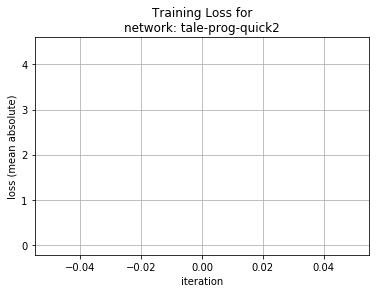

In [338]:
nd.plot_training_loss(network_model)

In [339]:
nd.plot_codec_params(network_model,iter1)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ec2-user/store/c2gen/out/tale-prog-quick2/out-c2cb-5'

In [ ]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [ ]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+".wav"))

Later Iterations
===

In [ ]:
nd.plot_codec_params(network_model,iter2)

In [ ]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [ ]:
display(Audio(filename="/home/ec2-user/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+".wav"))

Generate from another sample
--
Change first line of the next cell to `gen=True`

Set `outname` to be the base filename for the output file (stored to the *.generated* directory)

Set `c2file` to be the filename of the Codec2 encoded file containing the seed

Set `seed_start_index` to be one of: `"random"`, the frame number, or more conveniently the number of seconds into the audio (for example `"27s"`)

The generator takes several minutes to complete. It will not run if the `outname`_.wav_ file already exists.

The first 5 seconds of audio are the original seed data. The remaining audio is generated from the network model specified.

In [ ]:
gen=True
modelfn="out/tale-prog-large3/model-500.h5" 
outname="testout40w2"
c2file="test/TaleOfTwoCities_pt09.c2cb"
seed_start_index = "620s"



if gen:  
  os.chdir("/home/ec2-user/store/c2gen")
  if os.path.isfile('generated/'+outname+'.wav'):
    print("File", outname, "already exists")
  else:  
    print("Starting generator - this could take some time")
    call(["python", "lstm_c2_generation.py", "--generate="+outname, "--seed_index="+seed_start_index, c2file, modelfn])
    print("Generator complete")  
  display(Audio(filename="/home/ec2-user/store/c2gen/generated/"+outname+".wav"))  
  os.chdir("/home/ec2-user/store/c2gen/notebooks")